Generate some data

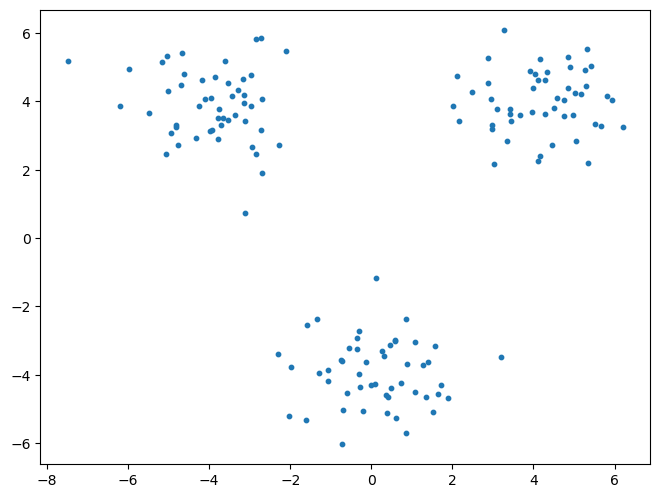

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# generate some random data
m = 50
X = np.vstack([np.random.randn(m, 2) + [4, 4],
               np.random.randn(m, 2) + [0, -4],
               np.random.randn(m, 2) + [-4, 4]])

# plot the data
plt.rcParams['figure.figsize'] = [20 / 2.54, 15 / 2.54]
plt.scatter(X[:, 0], X[:, 1], s=10);


Fit the k-means algorithm

In [2]:
from sklearn.cluster import KMeans

# fit the k-means algorithm
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)

# get the labels and centers of the clusters
labels = kmeans.predict(X)
centers = kmeans.cluster_centers_

In [3]:
print(labels)
print(centers)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[ 0.10874165 -3.94026928]
 [ 4.18312775  3.98267352]
 [-3.92774627  3.88520659]]


Visualize

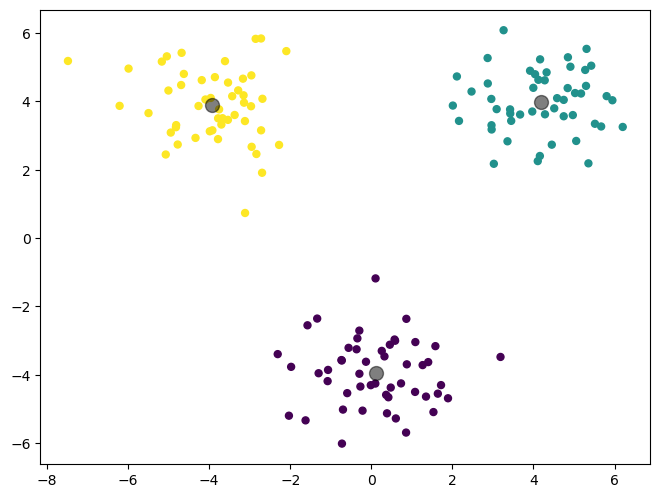

In [4]:
# plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=25, cmap='viridis')

# plot the centers of each cluster
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

Elbow method

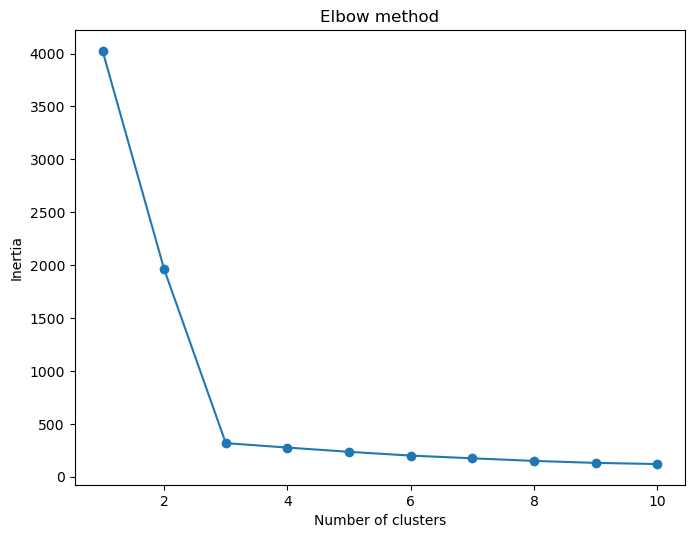

In [5]:
inertias = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image


def reduce_colors(image_path, k):
    # load the image and convert it to a numpy array
    image = Image.open(image_path)
    img_array = np.array(image)

    # flatten the array to be a list of pixels
    pixels = img_array.reshape(-1, img_array.shape[-1])

    # fit the k-means algorithm to the pixels
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)

    # get the labels and centers of the clusters
    labels = kmeans.predict(pixels)
    centers = kmeans.cluster_centers_

    # replace each pixel with its nearest center
    new_pixels = centers[labels].reshape(img_array.shape)

    # convert the array back to an image and return it
    return Image.fromarray(np.uint8(new_pixels))


/home/spartak/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


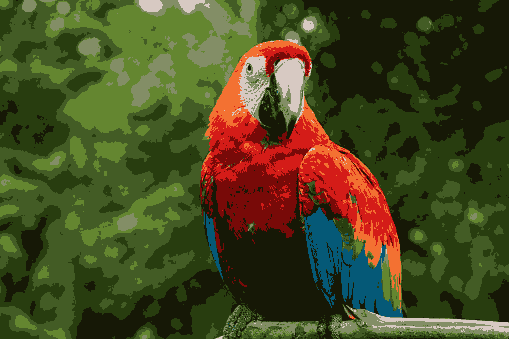

In [7]:
from IPython.display import display

image_path = "parrot.jpeg"
k = 10
new_image = reduce_colors("parrot.jpeg", k)
display(new_image)

As a homework implement k-means algorithm without using sklearn library

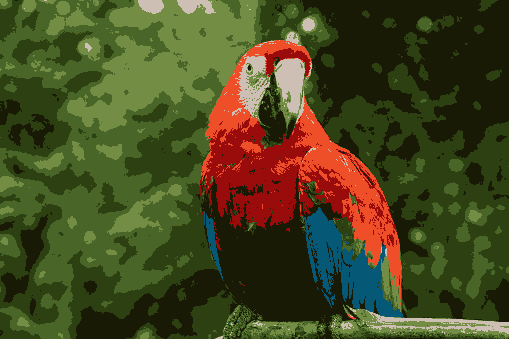

In [11]:
import numpy as np


class KMeans_Custom:
    def __init__(self, n_clusters=8, max_iter=300, random_state=42):
        '''
        Custom KMeans algorithm written specially for this problem
        :param n_clusters: Number of Clusters, initially is 8
        :param max_iter: Number of Maximum Iterations, initially is 300
        :param random_state: Random State
        '''
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centers = None

    def fit(self, X):
        np.random.seed(self.random_state)
        self.centers = X[np.random.choice(X.shape[0], self.n_clusters, replace=False)]

        for _ in range(self.max_iter):
            # Assign each point to the nearest center
            labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)
            new_centers = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
            if np.allclose(new_centers, self.centers): # Check for convergence
                break

            self.centers = new_centers

    def predict(self, X):
        return np.argmin(np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2), axis=1)


image_path = "parrot.jpeg"
image = Image.open(image_path)
img_array = np.array(image)

pixels = img_array.reshape(-1, img_array.shape[-1])

kmeans_custom = KMeans_Custom(n_clusters=8, random_state=0)
kmeans_custom.fit(pixels)

labels_custom = kmeans_custom.predict(pixels)
centers_custom = kmeans_custom.centers

new_pixels_custom = centers_custom[labels_custom].reshape(img_array.shape)

new_image_custom = Image.fromarray(np.uint8(new_pixels_custom))
display(new_image_custom)


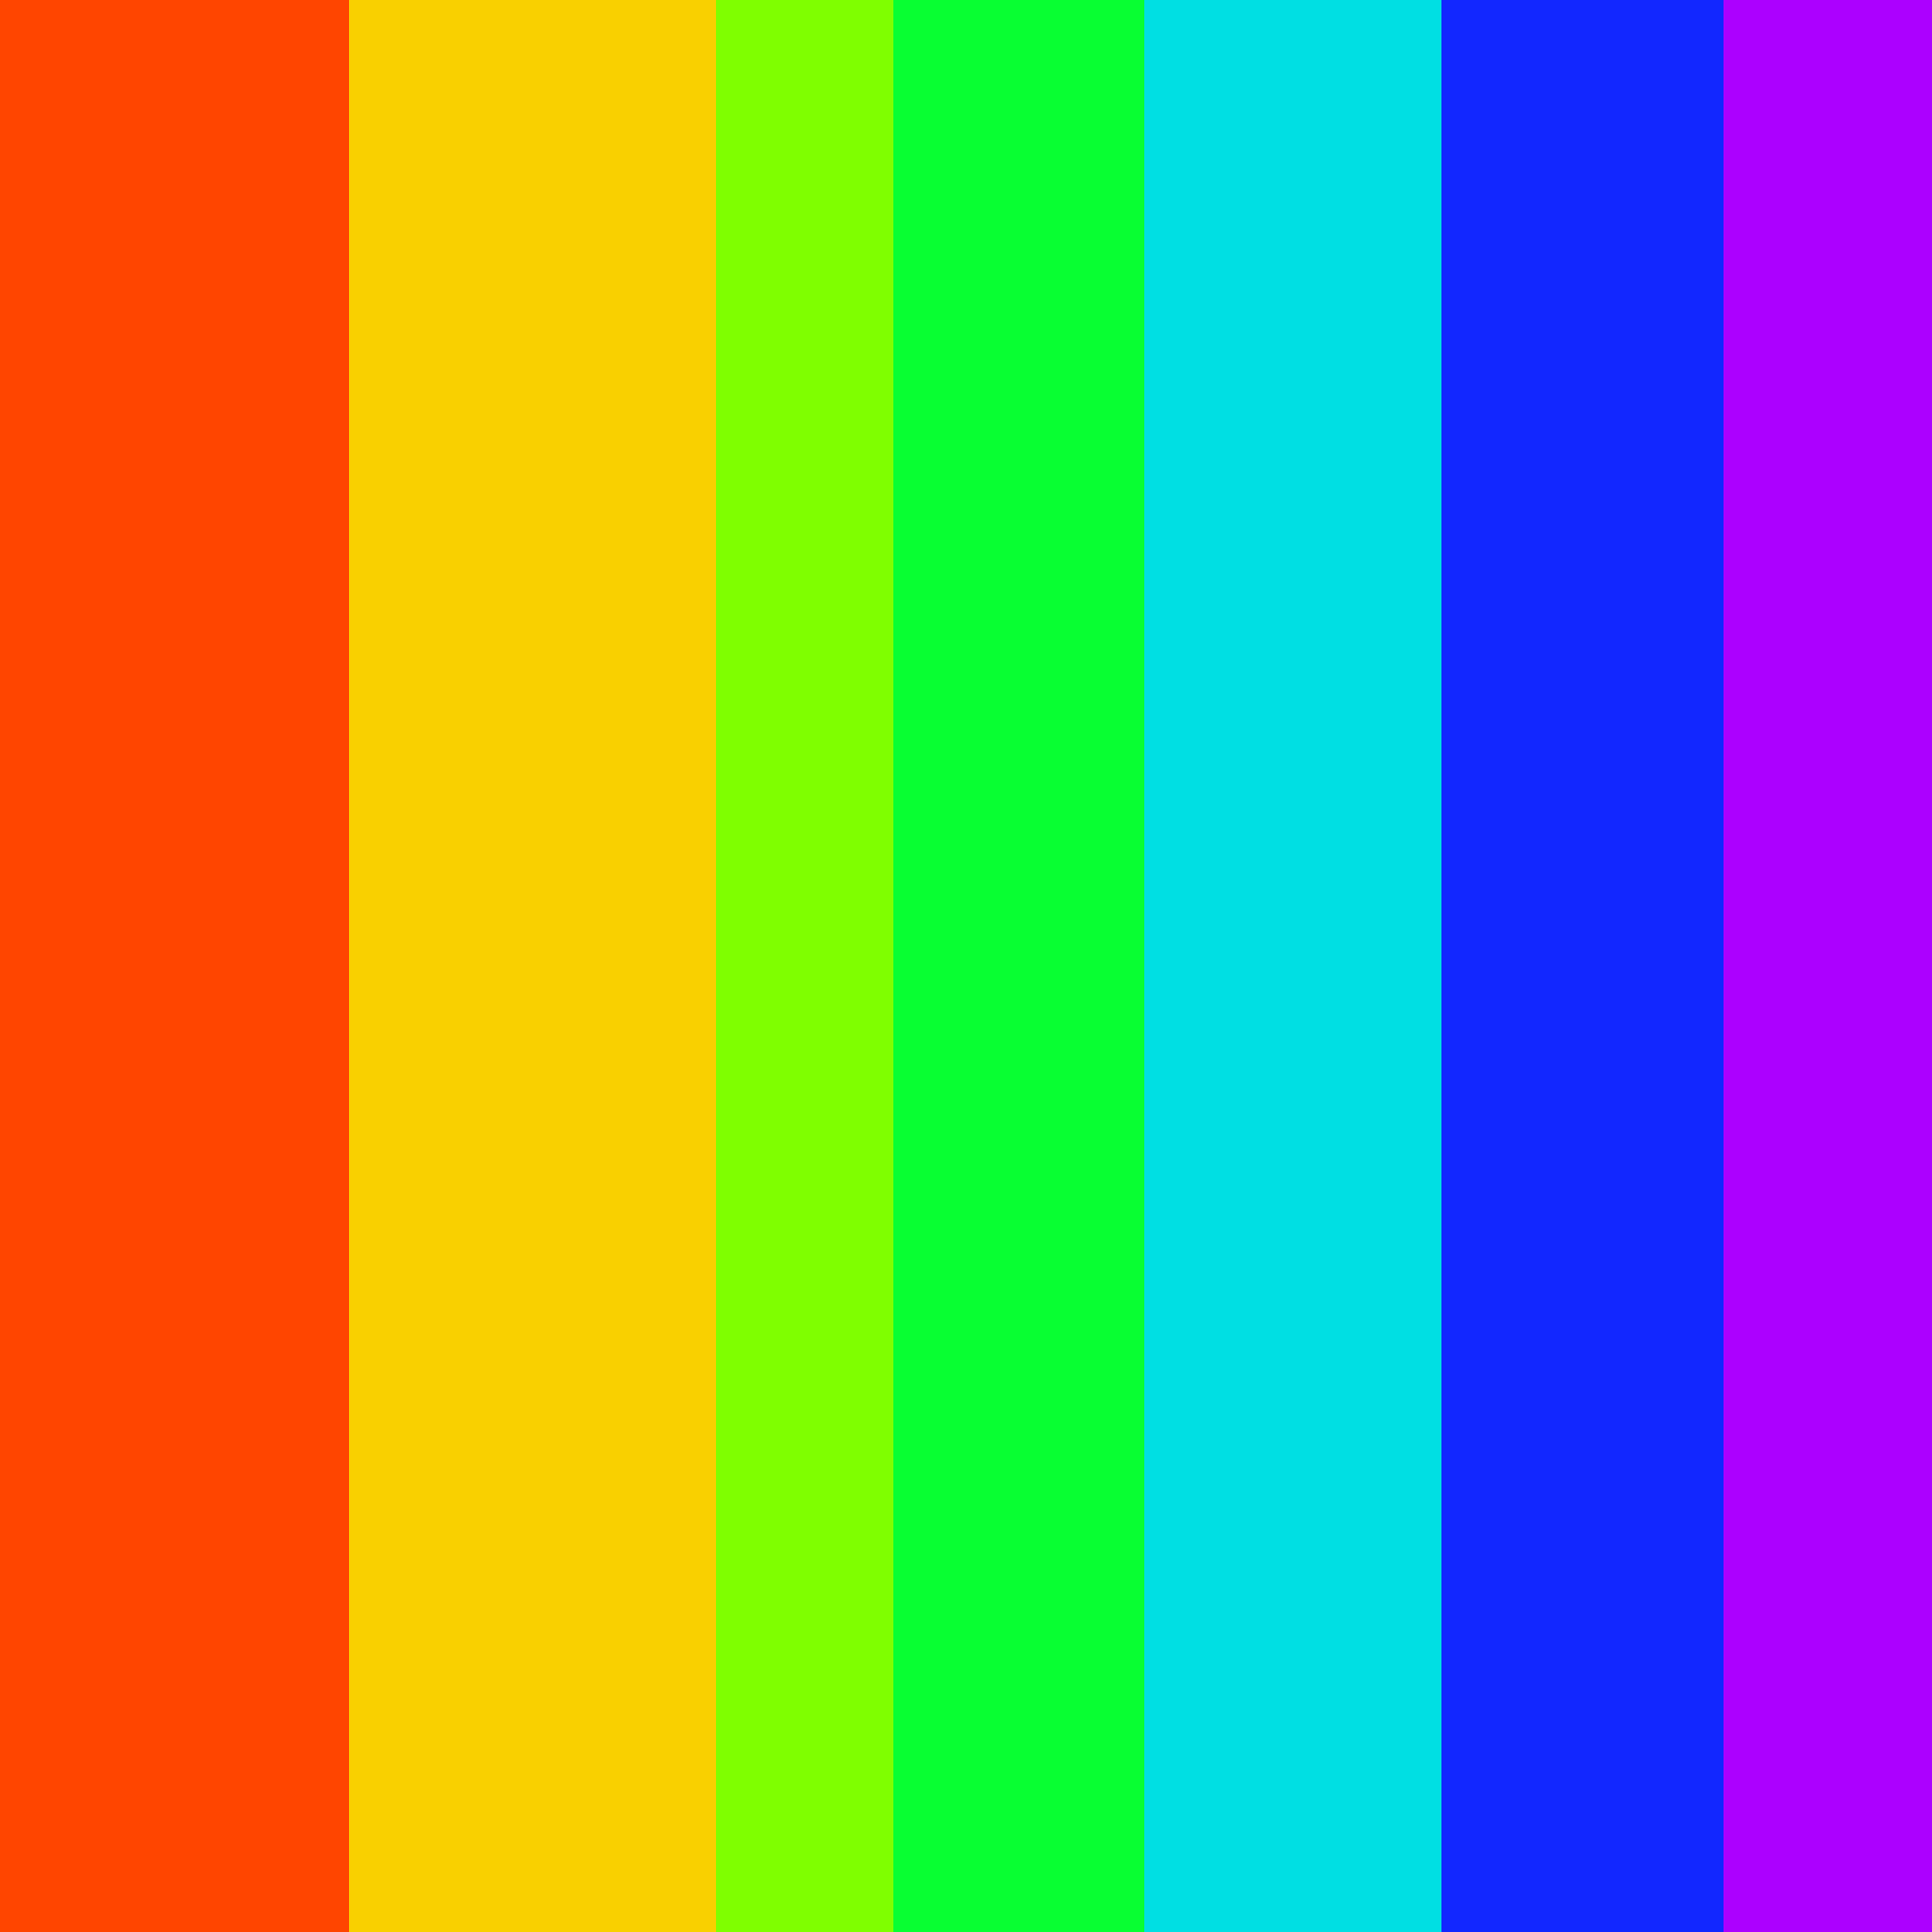

In [14]:
image_path = "Rainbow.png"
image = Image.open(image_path)
img_array = np.array(image)

pixels = img_array.reshape(-1, img_array.shape[-1])

kmeans_custom = KMeans_Custom(n_clusters=7, random_state=0)
kmeans_custom.fit(pixels)

labels_custom = kmeans_custom.predict(pixels)
centers_custom = kmeans_custom.centers

new_pixels_custom = centers_custom[labels_custom].reshape(img_array.shape)

new_image_custom = Image.fromarray(np.uint8(new_pixels_custom))
display(new_image_custom)


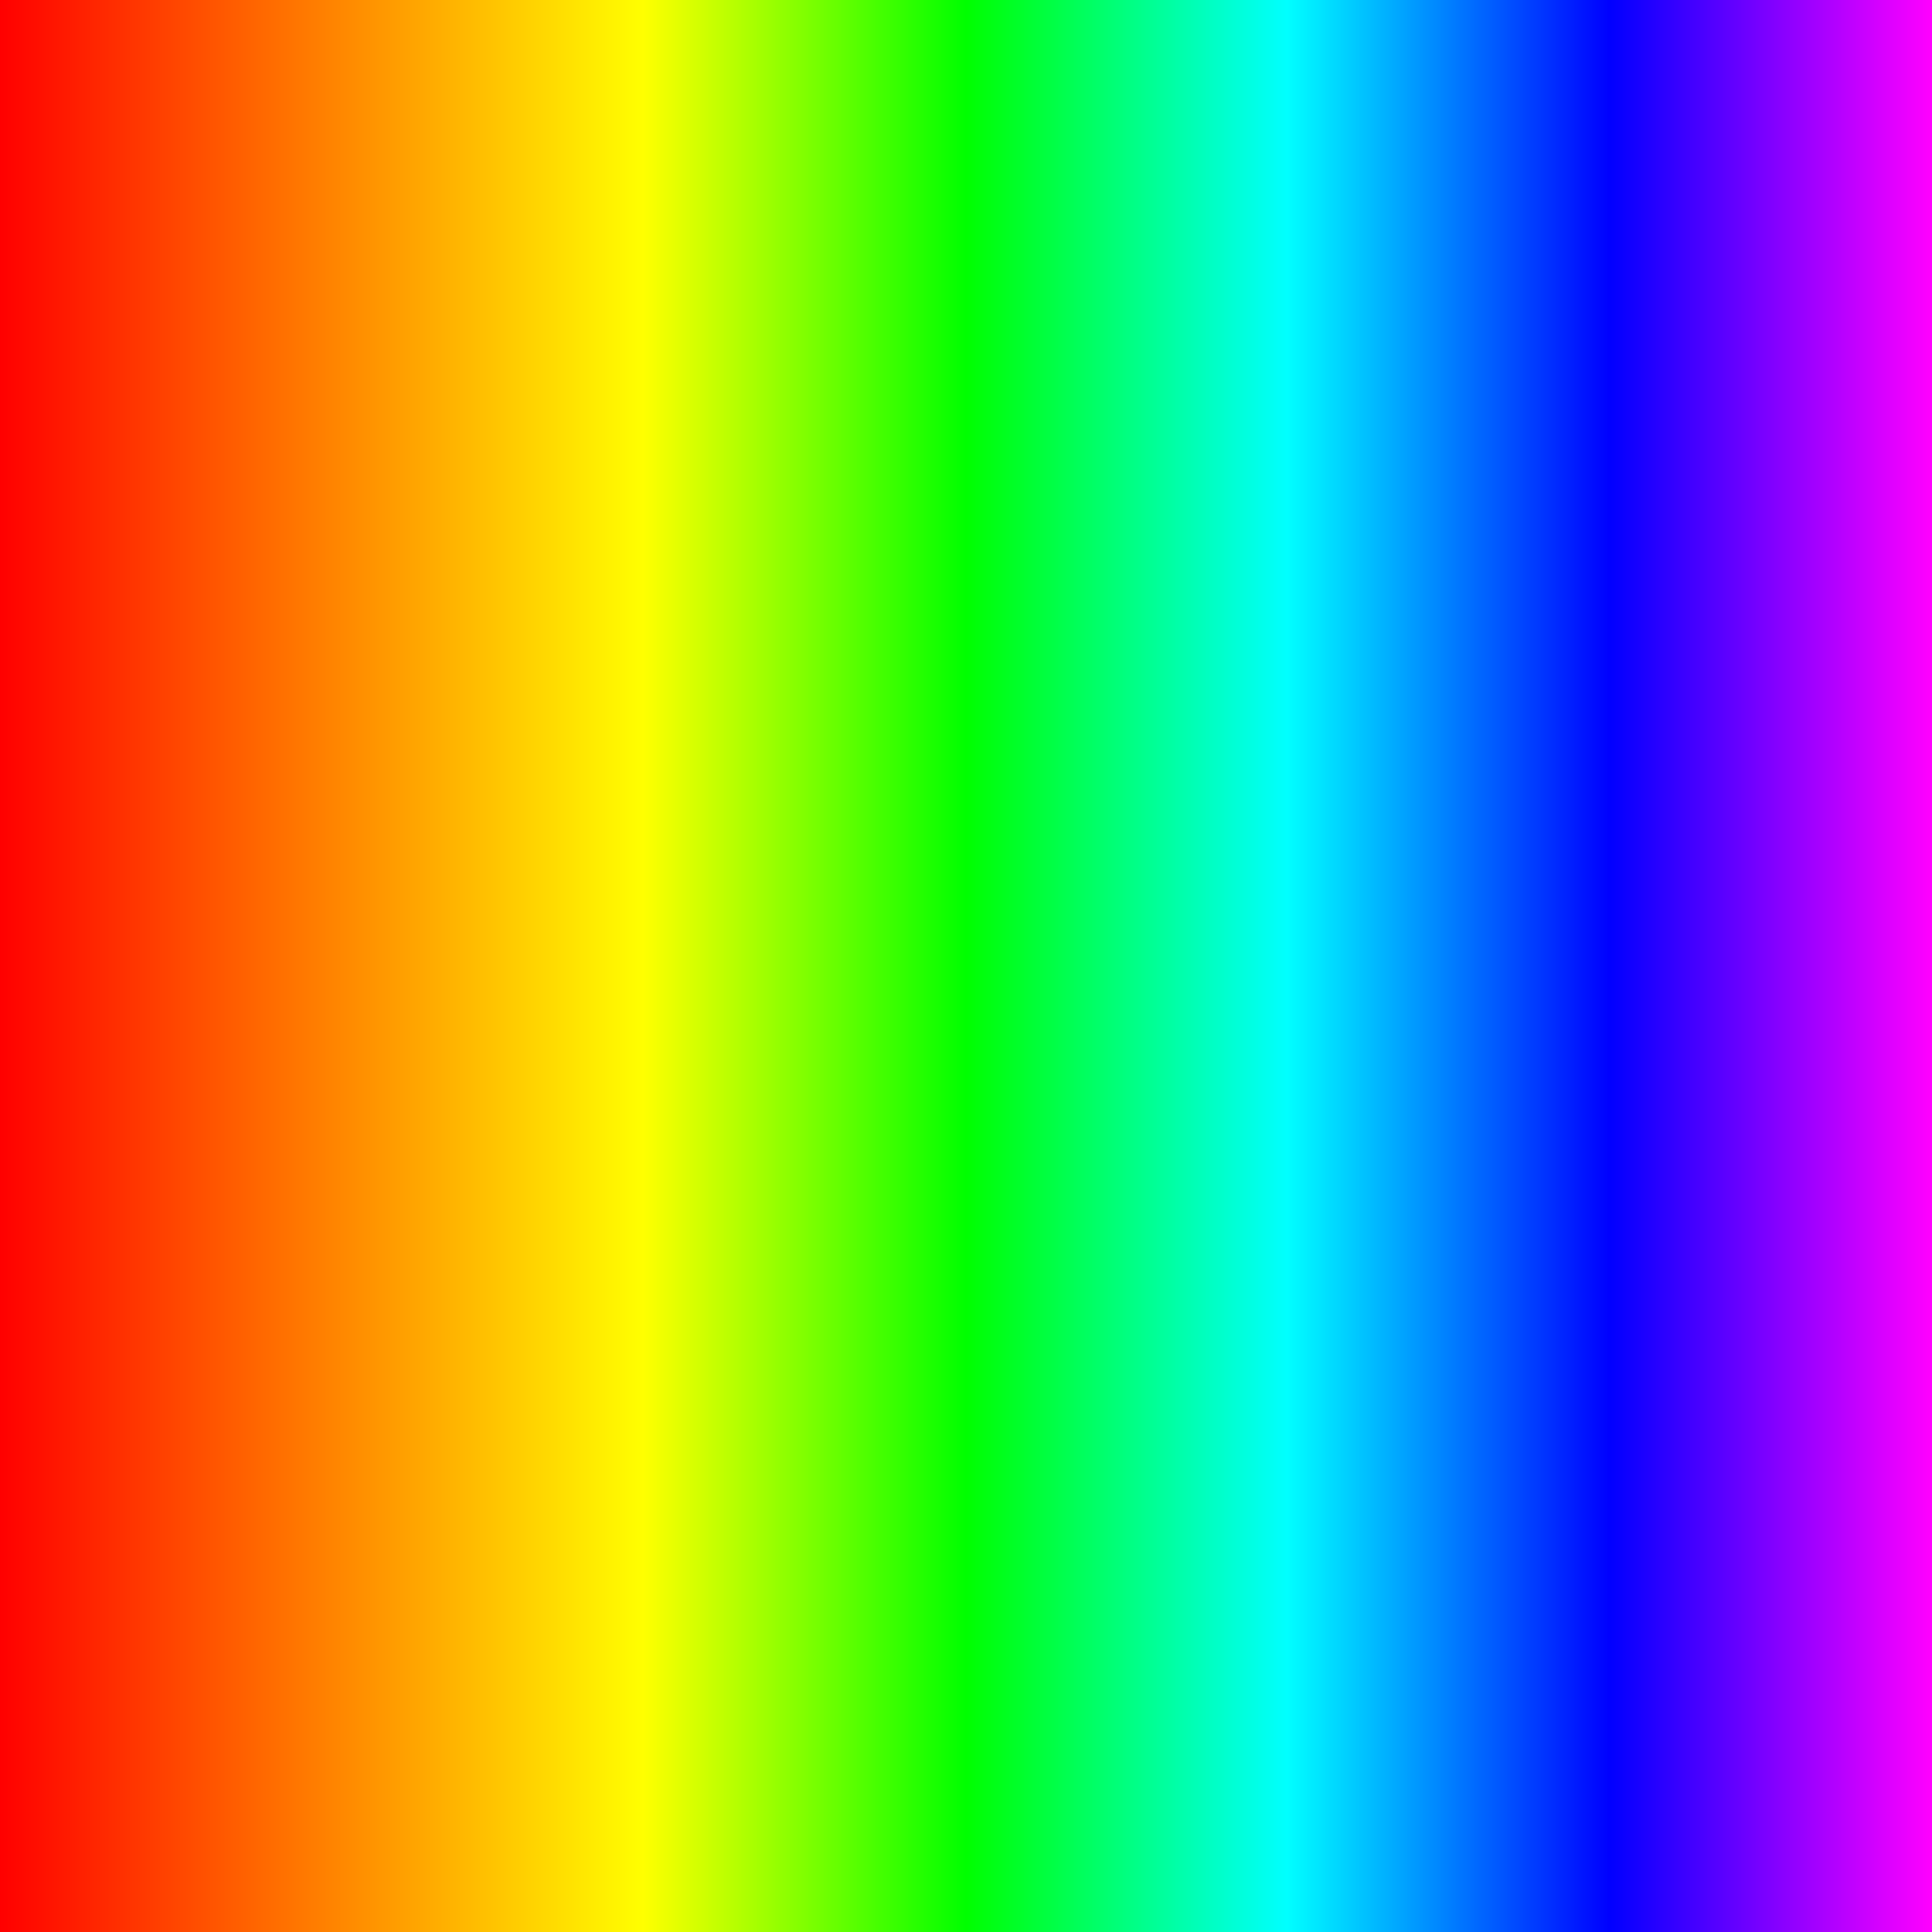

In [15]:
image